In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet50_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Reprocess
data_transform = transforms.Compose([
    transforms.CenterCrop(256),
    transforms.Resize(256),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1).to(device)

# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Before temperature - NLL: 1.155, ECE: 0.027
Optimal temperature: 0.990
After temperature - NLL: 1.155, ECE: 0.027


APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9690 ± 0.0012
Final Average Prediction Set Size: 30.74 ± 0.94
Final Average Coverage: 0.9490 ± 0.0020
Final Average Real Probability: 0.8780 ± 0.0035


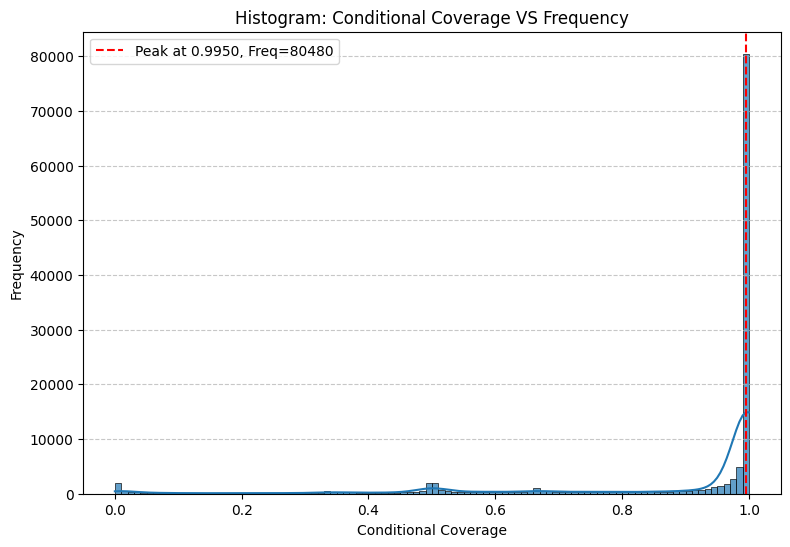

80480 (64.71%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1803 ± 0.0120
Final Average Prediction Set Size: 10.02 ± 0.25
Final Average Coverage: 0.9503 ± 0.0014
Final Average Real Probability: 0.8765 ± 0.0029


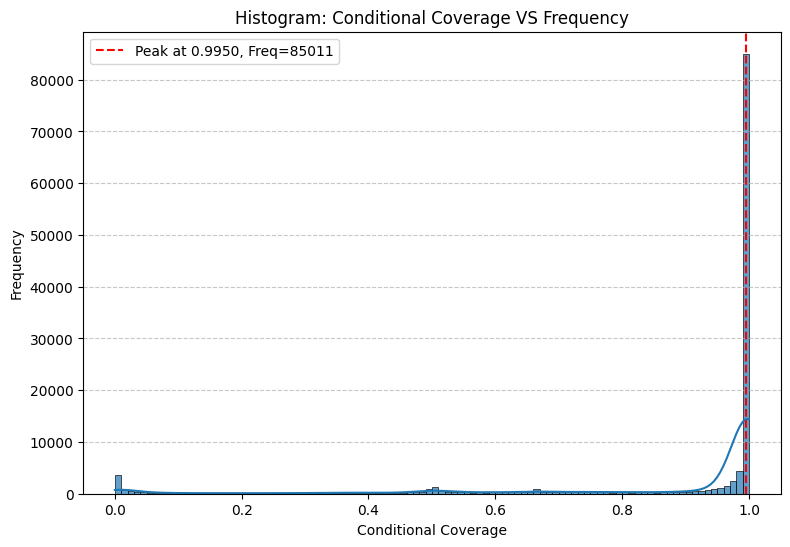

85011 (68.36%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.05, k_reg=6, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1020 ± 0.0078
Final Average Prediction Set Size: 7.88 ± 0.16
Final Average Coverage: 0.9499 ± 0.0013
Final Average Real Probability: 0.8730 ± 0.0020


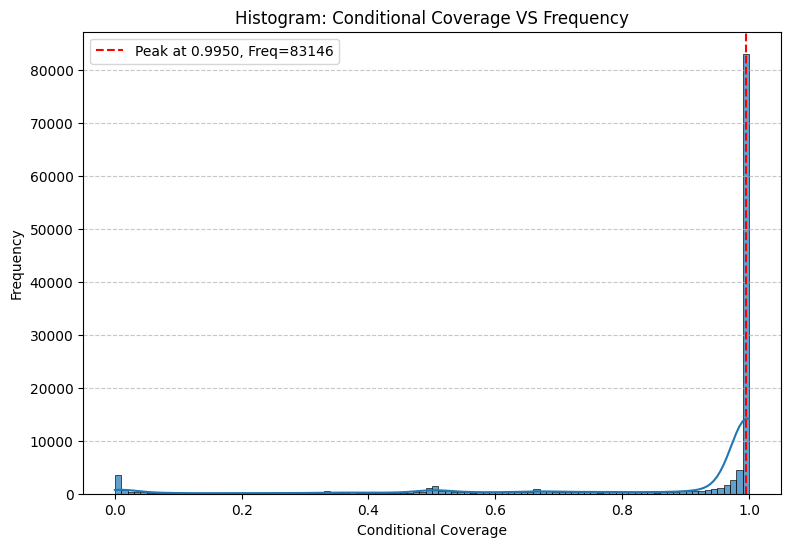

83146 (66.86%) samples reached the peak conditional coverage at 0.9950


In [2]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9679 ± 0.0014
Final Average Prediction Set Size: 30.56 ± 1.03
Final Average Coverage: 0.9490 ± 0.0024
Final Average Real Probability: 0.8781 ± 0.0037


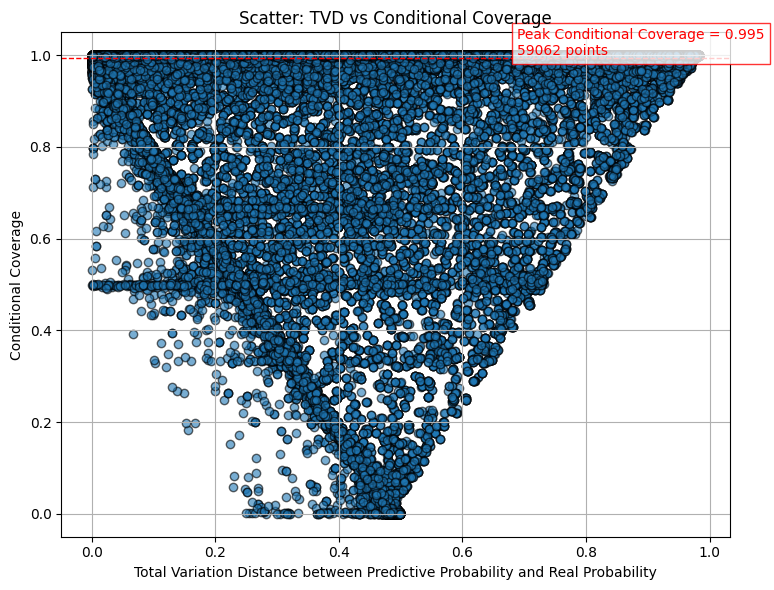

Peak Conditional Coverage = 0.995, with 59062 samples

=== Count Regions Summary ===
43049 (34.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
35893 (28.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
25332 (20.4%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.97034']
  Real Probability Set      : ['0.99960']
Sample 2:
  Predictive Probability Set: ['0.88967', '0.04051', '0.01628', '0.01460', '0.00474', '0.00273']
  Real Probability Set      : ['0.99333', '0.00031', '0.00000', '0.00543', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.51101', '0.48550']
  Real Probability Set      : ['0.53214', '0.46687']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.88486', '0.05846', '0.00960', '0.00721', '0.00662']
  Real Probability Set      : ['0.00043', '0.00018', '0.00000', '0.00000', '0.00024']
Sample 2:

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.1750 ± 0.0137
Final Average Prediction Set Size: 9.97 ± 0.18
Final Average Coverage: 0.9505 ± 0.0014
Final Average Real Probability: 0.8772 ± 0.0030


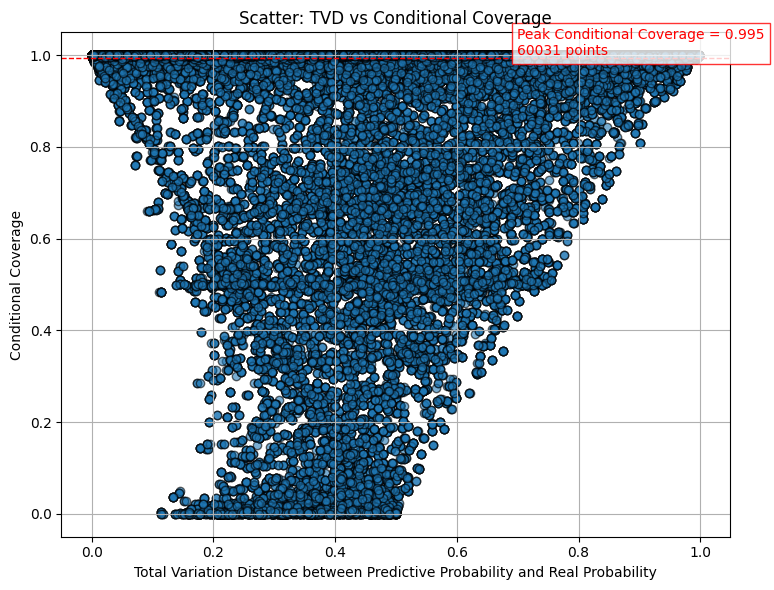

Peak Conditional Coverage = 0.995, with 60031 samples

=== Count Regions Summary ===
42936 (34.5%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
35318 (28.4%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
23836 (19.2%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.93005', '0.04879', '0.00816', '0.00690', '0.00154', '0.00062', '0.00033', '0.00021', '0.00020']
  Real Probability Set      : ['0.95481', '0.00112', '0.04295', '0.00112', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.99993', '0.00002', '0.00002', '0.00001', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
  Real Probability Set      : ['0.99799', '0.00067', '0.00000', '0.00067', '0.00067', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.98714', '0.00357', '0.00292', '0.00214', '0.00151', '0.00121', 

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, k_reg=6, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0953 ± 0.0086
Final Average Prediction Set Size: 7.74 ± 0.18
Final Average Coverage: 0.9500 ± 0.0014
Final Average Real Probability: 0.8728 ± 0.0029


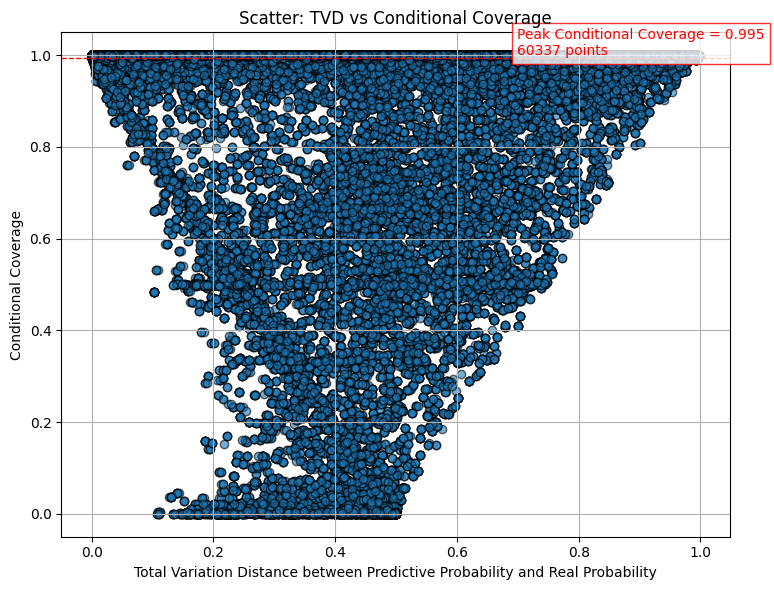

Peak Conditional Coverage = 0.995, with 60337 samples

=== Count Regions Summary ===
44311 (35.6%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
35152 (28.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
24849 (20.0%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.52323', '0.47235', '0.00421', '0.00008', '0.00003', '0.00001', '0.00001', '0.00001', '0.00001', '0.00001', '0.00000', '0.00000', '0.00000']
  Real Probability Set      : ['0.49941', '0.50012', '0.00047', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.95112', '0.01341', '0.01092', '0.00895']
  Real Probability Set      : ['0.99873', '0.00063', '0.00063', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.94370', '0.02954', '0.01189', '0.00566']
  Real Probability Set      : ['0.99785', '0

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.05, num_runs=10, alpha=0.05)